In [33]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import requests
import json
from config import api_key_bls
#series
headers = {'Content-type': 'application/json'} #contains info about the message- such as destination
# Submit the list of series as data - payload actual data being transmitted over a network
data = json.dumps({"seriesid": ['BDS0000000000000000110101LQ5',#Business Employment Dynamic
                                'LAUCN281070000000003', #Local Area Unemployement Stats
                                'MLUMS00NN0001003', #Mass Layoff Stats
                                'CUUR0000SA0', # Consumer Price Index
                                'LNS14000000', #unemployment leval
                                'LNS13000000'], #labor force leval
                   'startyear':'2010', 'endyear':'2023',
                   'catalog':True,
                   'annualaverage':True,
                   "registrationkey": api_key_bls}, indent=4)
p = requests.post('https://api.bls.gov/publicAPI/v2/timeseries/data/', data=data, headers=headers)
json_data = json.loads(p.text)
list_columns= []
for series in json_data['Results']['series']:
#     x=pd.DataFrame(columns=["series title","series id","seasonality","survey_name","measure_data_type","commerce_industy","commerce_sector",])
    seriesId = series['seriesID']
    print(seriesId)
    if 'catalog' in series.keys():
        seasonality = series['catalog']['seasonality']
        survey_name = series['catalog']['survey_name']
        measure_data_type = series['catalog']['measure_data_type']
        if 'commerce_industry' in series['catalog'].keys():
            commerce_industry = series['catalog']['commerce_industry']
        else:
            commerce_industry = None
        if 'commerce_sector' in series['catalog'].keys():
            commerce_sector = series['catalog']['commerce_sector']
        else:
            commerce_sector = None
        if 'area' in series['catalog'].keys():
            area = series['catalog']['area']
        else:
            area = None
       # area= series['catalog']['area']
    else:
        seasonality = None
        survey_name = None
        measure_data_type = None
        commerce_industry = None
        commerce_sector = None
        area= None
    #add all variables & create a list to append to the list above
    for item in series['data']:
        year = item['year']
        period = item['period']
        periodName = item['periodName']
        value = item['value']
        list_columns.append([seriesId,seasonality,survey_name,measure_data_type,
                             commerce_industry,commerce_sector,area,year,period,periodName,value])
column= pd.DataFrame(list_columns,columns=['seriesId','seasonality','survey_name','measure_data_type',
                             'commerce_industry','commerce_sector','area','year','period','periodName','value'])
column.head()
#         footnotes=""
#         for footnote in item['footnotes']:
#             if footnote:
#                 footnotes = footnotes + footnote['text'] + ','
#         if 'M01' <= period <= 'M12':
#            x.add_row([seriesId,year,period,value,footnotes[0:-1]])
#     output = open(seriesId + '.txt','w')
#     output.write (x.get_string())
#     output.close()

BDS0000000000000000110101LQ5
LAUCN281070000000003
MLUMS00NN0001003
CUUR0000SA0
LNS14000000
LNS13000000


,seriesId,seasonality,survey_name,measure_data_type,commerce_industry,commerce_sector,area,year,period,periodName,value
0,BDS0000000000000000110101LQ5,Seasonally Adjusted,Business Employment Dynamics,Gross Job Gains,Total private,Private Sector,U.S. totals,2022,Q02,2nd Quarter,955
1,BDS0000000000000000110101LQ5,Seasonally Adjusted,Business Employment Dynamics,Gross Job Gains,Total private,Private Sector,U.S. totals,2022,Q01,1st Quarter,989
2,BDS0000000000000000110101LQ5,Seasonally Adjusted,Business Employment Dynamics,Gross Job Gains,Total private,Private Sector,U.S. totals,2021,Q04,4th Quarter,1138
3,BDS0000000000000000110101LQ5,Seasonally Adjusted,Business Employment Dynamics,Gross Job Gains,Total private,Private Sector,U.S. totals,2021,Q03,3rd Quarter,1064
4,BDS0000000000000000110101LQ5,Seasonally Adjusted,Business Employment Dynamics,Gross Job Gains,Total private,Private Sector,U.S. totals,2021,Q02,2nd Quarter,999


In [34]:
dataset_unemployment="Unemployment_2010-2023.csv"
dataset_CPI="CPI_(2010-2023).csv"
dataset_interest_rate="Interest_Rates_Annual.csv"
table_unemployment =  pd.read_csv(dataset_unemployment, header=11)
table_CPI= pd.read_csv(dataset_CPI, header=11)
table_interest_rate= pd.read_csv(dataset_interest_rate, header=7)
table_unemployment

,Year,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
0,2010,9.8,9.8,9.9,9.9,9.6,9.4,9.4,9.5,9.5,9.4,9.8,9.3
1,2011,9.1,9.0,9.0,9.1,9.0,9.1,9.0,9.0,9.0,8.8,8.6,8.5
2,2012,8.3,8.3,8.2,8.2,8.2,8.2,8.2,8.1,7.8,7.8,7.7,7.9
3,2013,8.0,7.7,7.5,7.6,7.5,7.5,7.3,7.2,7.2,7.2,6.9,6.7
4,2014,6.6,6.7,6.7,6.2,6.3,6.1,6.2,6.1,5.9,5.7,5.8,5.6
5,2015,5.7,5.5,5.4,5.4,5.6,5.3,5.2,5.1,5.0,5.0,5.1,5.0
6,2016,4.8,4.9,5.0,5.1,4.8,4.9,4.8,4.9,5.0,4.9,4.7,4.7
7,2017,4.7,4.6,4.4,4.4,4.4,4.3,4.3,4.4,4.3,4.2,4.2,4.1
8,2018,4.0,4.1,4.0,4.0,3.8,4.0,3.8,3.8,3.7,3.8,3.8,3.9
9,2019,4.0,3.8,3.8,3.6,3.7,3.6,3.7,3.7,3.5,3.6,3.6,3.6


In [35]:
table_unemployment['Average']= table_unemployment[['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']].mean(numeric_only=True, axis=1)
table_unemployment

,Year,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,Average
0,2010,9.8,9.8,9.9,9.9,9.6,9.4,9.4,9.5,9.5,9.4,9.8,9.3,9.608333
1,2011,9.1,9.0,9.0,9.1,9.0,9.1,9.0,9.0,9.0,8.8,8.6,8.5,8.933333
2,2012,8.3,8.3,8.2,8.2,8.2,8.2,8.2,8.1,7.8,7.8,7.7,7.9,8.075000
3,2013,8.0,7.7,7.5,7.6,7.5,7.5,7.3,7.2,7.2,7.2,6.9,6.7,7.358333
4,2014,6.6,6.7,6.7,6.2,6.3,6.1,6.2,6.1,5.9,5.7,5.8,5.6,6.158333
5,2015,5.7,5.5,5.4,5.4,5.6,5.3,5.2,5.1,5.0,5.0,5.1,5.0,5.275000
6,2016,4.8,4.9,5.0,5.1,4.8,4.9,4.8,4.9,5.0,4.9,4.7,4.7,4.875000
7,2017,4.7,4.6,4.4,4.4,4.4,4.3,4.3,4.4,4.3,4.2,4.2,4.1,4.358333
8,2018,4.0,4.1,4.0,4.0,3.8,4.0,3.8,3.8,3.7,3.8,3.8,3.9,3.891667
9,2019,4.0,3.8,3.8,3.6,3.7,3.6,3.7,3.7,3.5,3.6,3.6,3.6,3.683333


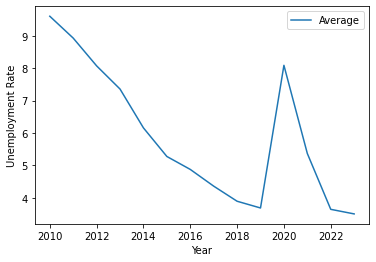

In [51]:
table_unemployment.plot(x='Year',y='Average', kind='line')
plt.ylabel("Unemployment Rate")
plt.show()

In [37]:
table_CPI

,Year,Period,Label,Observation Value,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12
0,2010,M01,2010 Jan,217.488,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2010,M02,2010 Feb,217.281,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2010,M03,2010 Mar,217.353,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2010,M04,2010 Apr,217.403,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2010,M05,2010 May,217.290,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
153,2022,M10,2022 Oct,297.987,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
154,2022,M11,2022 Nov,298.598,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
155,2022,M12,2022 Dec,298.990,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
156,2023,M01,2023 Jan,300.536,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [38]:
table_CPI2 = table_CPI.dropna(1).copy()
table_CPI2

,Year,Period,Label,Observation Value
0,2010,M01,2010 Jan,217.488
1,2010,M02,2010 Feb,217.281
2,2010,M03,2010 Mar,217.353
3,2010,M04,2010 Apr,217.403
4,2010,M05,2010 May,217.290
...,...,...,...,...
153,2022,M10,2022 Oct,297.987
154,2022,M11,2022 Nov,298.598
155,2022,M12,2022 Dec,298.990
156,2023,M01,2023 Jan,300.536


In [39]:
row_names = {'2010 Jan':'Jan',
             '2010 Feb':'Feb',
             '2010 Mar':'Mar',
             '2010 Apr':'Apr',
             '2010 May':'May',
             '2010 Jun':'Jun',
             '2010 Jul':'Jul',
             '2010 Aug':'Aug',
             '2010 Sep':'Sep',
             '2010 Oct':'Oct',
             '2010 Nov':'Nov',
             '2010 Dec':'Dec',
             '2011 Jan':'Jan',
             '2011 Feb':'Feb',
             '2011 Mar':'Mar',
             '2011 Apr':'Apr',
             '2011 May':'May',
             '2011 Jun':'Jun',
             '2011 Jul':'Jul',
             '2011 Aug':'Aug',
             '2011 Sep':'Sep',
             '2011 Oct':'Oct',
             '2011 Nov':'Nov',
             '2011 Dec':'Dec',
             '2012 Jan':'Jan',
             '2012 Feb':'Feb',
             '2012 Mar':'Mar',
             '2012 Apr':'Apr',
             '2012 May':'May',
             '2012 Jun':'Jun',
             '2012 Jul':'Jul',
             '2012 Aug':'Aug',
             '2012 Sep':'Sep',
             '2012 Oct':'Oct',
             '2012 Nov':'Nov',
             '2012 Dec':'Dec',
             '2013 Jan':'Jan',
             '2013 Feb':'Feb',
             '2013 Mar':'Mar',
             '2013 Apr':'Apr',
             '2013 May':'May',
             '2013 Jun':'Jun',
             '2013 Jul':'Jul',
             '2013 Aug':'Aug',
             '2013 Sep':'Sep',
             '2013 Oct':'Oct',
             '2013 Nov':'Nov',
             '2013 Dec':'Dec',
             '2014 Jan':'Jan',
             '2014 Feb':'Feb',
             '2014 Mar':'Mar',
             '2014 Apr':'Apr',
             '2014 May':'May',
             '2014 Jun':'Jun',
             '2014 Jul':'Jul',
             '2014 Aug':'Aug',
             '2014 Sep':'Sep',
             '2014 Oct':'Oct',
             '2014 Nov':'Nov',
             '2014 Dec':'Dec',
             '2015 Jan':'Jan',
             '2015 Feb':'Feb',
             '2015 Mar':'Mar',
             '2015 Apr':'Apr',
             '2015 May':'May',
             '2015 Jun':'Jun',
             '2015 Jul':'Jul',
             '2015 Aug':'Aug',
             '2015 Sep':'Sep',
             '2015 Oct':'Oct',
             '2015 Nov':'Nov',
             '2015 Dec':'Dec',
             '2016 Jan':'Jan',
             '2016 Feb':'Feb',
             '2016 Mar':'Mar',
             '2016 Apr':'Apr',
             '2016 May':'May',
             '2016 Jun':'Jun',
             '2016 Jul':'Jul',
             '2016 Aug':'Aug',
             '2016 Sep':'Sep',
             '2016 Oct':'Oct',
             '2016 Nov':'Nov',
             '2016 Dec':'Dec',
             '2017 Jan':'Jan',
             '2017 Feb':'Feb',
             '2017 Mar':'Mar',
             '2017 Apr':'Apr',
             '2017 May':'May',
             '2017 Jun':'Jun',
             '2017 Jul':'Jul',
             '2017 Aug':'Aug',
             '2017 Sep':'Sep',
             '2017 Oct':'Oct',
             '2017 Nov':'Nov',
             '2017 Dec':'Dec',
             '2018 Jan':'Jan',
             '2018 Feb':'Feb',
             '2018 Mar':'Mar',
             '2018 Apr':'Apr',
             '2018 May':'May',
             '2018 Jun':'Jun',
             '2018 Jul':'Jul',
             '2018 Aug':'Aug',
             '2018 Sep':'Sep',
             '2018 Oct':'Oct',
             '2018 Nov':'Nov',
             '2018 Dec':'Dec',
             '2019 Jan':'Jan',
             '2019 Feb':'Feb',
             '2019 Mar':'Mar',
             '2019 Apr':'Apr',
             '2019 May':'May',
             '2019 Jun':'Jun',
             '2019 Jul':'Jul',
             '2019 Aug':'Aug',
             '2019 Sep':'Sep',
             '2019 Oct':'Oct',
             '2019 Nov':'Nov',
             '2019 Dec':'Dec',
             '2020 Jan':'Jan',
             '2020 Feb':'Feb',
             '2020 Mar':'Mar',
             '2020 Apr':'Apr',
             '2020 May':'May',
             '2020 Jun':'Jun',
             '2020 Jul':'Jul',
             '2020 Aug':'Aug',
             '2020 Sep':'Sep',
             '2020 Oct':'Oct',
             '2020 Nov':'Nov',
             '2020 Dec':'Dec',
             '2021 Jan':'Jan',
             '2021 Feb':'Feb',
             '2021 Mar':'Mar',
             '2021 Apr':'Apr',
             '2021 May':'May',
             '2021 Jun':'Jun',
             '2021 Jul':'Jul',
             '2021 Aug':'Aug',
             '2021 Sep':'Sep',
             '2021 Oct':'Oct',
             '2021 Nov':'Nov',
             '2021 Dec':'Dec',
             '2022 Jan':'Jan',
             '2022 Feb':'Feb',
             '2022 Mar':'Mar',
             '2022 Apr':'Apr',
             '2022 May':'May',
             '2022 Jun':'Jun',
             '2022 Jul':'Jul',
             '2022 Aug':'Aug',
             '2022 Sep':'Sep',
             '2022 Oct':'Oct',
             '2022 Nov':'Nov',
             '2022 Dec':'Dec',
             '2023 Jan':'Jan',
             '2023 Feb':'Feb'
            }
table_CPI2.replace(row_names, inplace=True)
table_CPI2

,Year,Period,Label,Observation Value
0,2010,M01,Jan,217.488
1,2010,M02,Feb,217.281
2,2010,M03,Mar,217.353
3,2010,M04,Apr,217.403
4,2010,M05,May,217.290
...,...,...,...,...
153,2022,M10,Oct,297.987
154,2022,M11,Nov,298.598
155,2022,M12,Dec,298.990
156,2023,M01,Jan,300.536


In [40]:
CPI3=table_CPI2.pivot(index="Year", columns="Label", values ="Observation Value")
CPI3

Label,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
Year,,,,,,,,,,,,
2010,217.403,217.923,220.472,217.281,217.488,217.605,217.199,217.353,217.290,219.590,219.035,218.275
2011,224.093,226.106,227.223,221.898,221.187,225.395,224.806,223.046,224.806,227.169,226.750,226.597
2012,229.187,229.918,231.221,228.329,227.842,228.590,228.524,228.807,228.713,231.249,231.638,231.015
2013,231.797,233.456,234.719,232.937,231.679,232.900,232.445,232.282,231.893,234.100,233.669,233.544
2014,236.468,237.460,236.252,235.547,235.288,237.498,237.231,236.028,236.918,236.983,237.430,237.477
2015,236.222,238.033,237.761,235.342,234.747,238.034,237.657,235.976,237.001,238.017,237.733,237.498
2016,238.992,240.545,242.637,237.336,237.652,240.101,240.222,238.080,239.557,242.026,241.741,241.176
2017,244.193,245.183,247.805,244.006,243.618,244.243,244.163,243.892,244.004,247.284,246.626,246.435
2018,250.227,251.663,252.767,249.529,248.859,251.214,251.018,249.577,250.792,252.594,252.772,252.182


In [41]:
CPI3['Average']= CPI3[['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']].mean(numeric_only=True, axis=1)
CPI3


Label,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep,Average
Year,,,,,,,,,,,,,
2010,217.403,217.923,220.472,217.281,217.488,217.605,217.199,217.353,217.290,219.590,219.035,218.275,218.076167
2011,224.093,226.106,227.223,221.898,221.187,225.395,224.806,223.046,224.806,227.169,226.750,226.597,224.923000
2012,229.187,229.918,231.221,228.329,227.842,228.590,228.524,228.807,228.713,231.249,231.638,231.015,229.586083
2013,231.797,233.456,234.719,232.937,231.679,232.900,232.445,232.282,231.893,234.100,233.669,233.544,232.951750
2014,236.468,237.460,236.252,235.547,235.288,237.498,237.231,236.028,236.918,236.983,237.430,237.477,236.715000
2015,236.222,238.033,237.761,235.342,234.747,238.034,237.657,235.976,237.001,238.017,237.733,237.498,237.001750
2016,238.992,240.545,242.637,237.336,237.652,240.101,240.222,238.080,239.557,242.026,241.741,241.176,240.005417
2017,244.193,245.183,247.805,244.006,243.618,244.243,244.163,243.892,244.004,247.284,246.626,246.435,245.121000
2018,250.227,251.663,252.767,249.529,248.859,251.214,251.018,249.577,250.792,252.594,252.772,252.182,251.099500


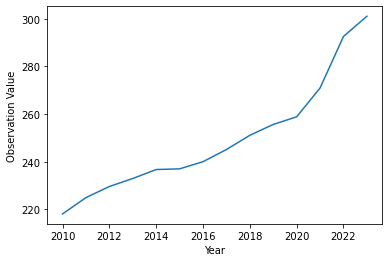

In [50]:
CPI3['Average'].plot(kind='line')
plt.ylabel("Observation Value")
plt.show()

In [48]:
table_interest_rate

,Unnamed: 0,Indicator,Unnamed: 2,Unnamed: 3,Scale,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,NaN,Central Bank Policy Rate,Percent per Annum,FPOLM_PA,Units,0.13,0.13,0.13,0.13,0.13,0.38,0.63,1.38,2.38,1.63,0.13,0.13
1,NaN,Discount Rate,Percent per Annum,FID_PA,Units,0.75,0.75,0.75,0.75,0.75,1.00,1.25,2.00,3.00,2.25,0.25,...
2,NaN,Money Market Rate,Percent per Annum,FIMM_PA,Units,0.18,0.10,0.14,0.11,0.09,0.13,0.40,1.00,1.83,2.16,0.38,0.08
3,NaN,Treasury Bill Rate,Percent per Annum,FITB_PA,Units,0.13,0.06,0.09,0.06,0.04,0.05,0.32,0.93,1.94,2.07,0.38,0.04
4,NaN,Lending Rate,Percent per Annum,FILR_PA,Units,3.25,3.25,3.25,3.25,3.25,3.26,3.51,4.10,4.90,5.28,3.54,3.25
5,NaN,Government Bonds,Percent per Annum,FIGB_PA,Units,3.21,2.79,1.80,2.35,2.54,2.14,1.84,2.33,2.91,2.14,0.89,1.40


In [44]:
table_interest_rate1=table_interest_rate.drop(columns=['Unnamed: 0','Unnamed: 2','Unnamed: 3','Scale'])
table_interest_rate1=table_interest_rate1.transpose()
new_header = table_interest_rate1.iloc[0] #grab the first row for the header
table_interest_rate1 = table_interest_rate1[1:] #take the data less the header row
table_interest_rate1.columns = new_header #set the header row as the df header
table_interest_rate1

Indicator,Central Bank Policy Rate,Discount Rate,Money Market Rate,Treasury Bill Rate,Lending Rate,Government Bonds
2010,0.13,0.75,0.18,0.13,3.25,3.21
2011,0.13,0.75,0.1,0.06,3.25,2.79
2012,0.13,0.75,0.14,0.09,3.25,1.8
2013,0.13,0.75,0.11,0.06,3.25,2.35
2014,0.13,0.75,0.09,0.04,3.25,2.54
2015,0.38,1,0.13,0.05,3.26,2.14
2016,0.63,1.25,0.4,0.32,3.51,1.84
2017,1.38,2,1,0.93,4.1,2.33
2018,2.38,3,1.83,1.94,4.9,2.91
2019,1.63,2.25,2.16,2.07,5.28,2.14


In [45]:
table_interest_rate1
table_interest_rate1['Discount Rate'].replace("...","0.25", regex=True, inplace=True)
table_interest_rate1

Indicator,Central Bank Policy Rate,Discount Rate,Money Market Rate,Treasury Bill Rate,Lending Rate,Government Bonds
2010,0.13,0.75,0.18,0.13,3.25,3.21
2011,0.13,0.75,0.1,0.06,3.25,2.79
2012,0.13,0.75,0.14,0.09,3.25,1.8
2013,0.13,0.75,0.11,0.06,3.25,2.35
2014,0.13,0.75,0.09,0.04,3.25,2.54
2015,0.38,1,0.13,0.05,3.26,2.14
2016,0.63,1.25,0.4,0.32,3.51,1.84
2017,1.38,2,1,0.93,4.1,2.33
2018,2.38,3,1.83,1.94,4.9,2.91
2019,1.63,2.25,2.16,2.07,5.28,2.14


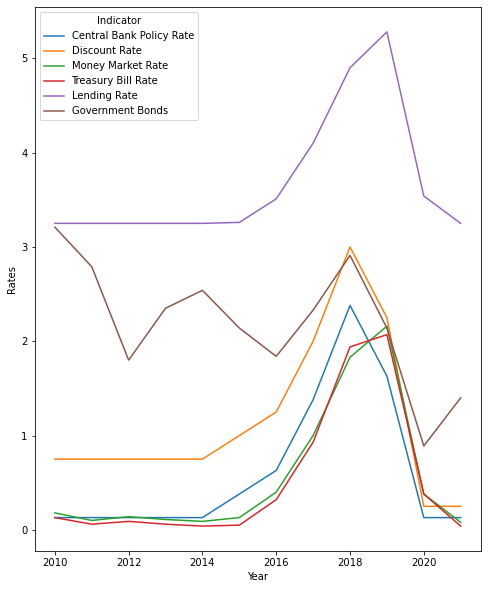

In [49]:
table_interest_rate1['Central Bank Policy Rate'] = table_interest_rate1['Central Bank Policy Rate'].astype(float)
table_interest_rate1['Money Market Rate'] = table_interest_rate1['Money Market Rate'].astype(float)
table_interest_rate1['Treasury Bill Rate'] = table_interest_rate1['Treasury Bill Rate'].astype(float)
table_interest_rate1['Lending Rate'] = table_interest_rate1['Lending Rate'].astype(float)
table_interest_rate1['Government Bonds'] = table_interest_rate1['Government Bonds'].astype(float)
table_interest_rate1['Discount Rate'] = table_interest_rate1['Discount Rate'].astype(float)
table_interest_rate1.plot(figsize = (8, 10))
plt.ylabel("Rates")
plt.xlabel("Year")
plt.show()

In [ ]:
table_interest_rate1
CPI3